# 控制页面布局

```{warning}
这个页面上的许多特性都是实验性的，可以随时更改。
```

有几种方法可以用 Jupyter Book 控制页面的布局。这些想法中的许多灵感来自于 [Edward Tufte 的 CSS布局指南](https://edwardtufte.github.io/tufte-css/)。

让我们从一个示例图开始。您可以单击右边的触发按钮来查看生成它的代码。

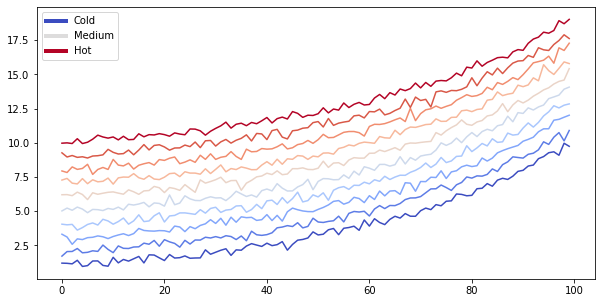

In [1]:
def make_fig(figsize):
    from matplotlib import rcParams, cycler
    import matplotlib.pyplot as plt
    import numpy as np
    plt.ion()

    # Fixing random state for reproducibility
    np.random.seed(19680801)

    N = 10
    data = [np.logspace(0, 1, 100) + .2 * np.random.randn(100) + ii for ii in range(N)]
    data = np.array(data).T
    cmap = plt.cm.coolwarm
    rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                    Line2D([0], [0], color=cmap(.5), lw=4),
                    Line2D([0], [0], color=cmap(1.), lw=4)]

    fig, ax = plt.subplots(figsize=figsize)
    lines = ax.plot(data)
    ax.legend(custom_lines, ['Cold', 'Medium', 'Hot'])
make_fig(figsize=(10, 5))

(layout/sidebar)=
## 侧边栏内容

添加侧边栏元素允许您提供上下文信息，而不会破坏主要内容的流。它是 [Tufte 风格指南](https://edwardtufte.github.io/tufte-css/) 中推荐的主要模式之一。

Jupyter Book 支持两种侧边栏。我们将在下面描述它们。

```{note}
一些侧边栏内容根据屏幕大小表现不同。如果屏幕足够窄，侧边栏内容将与您的内容保持一致。把屏幕调宽，它就会向右弹出。
```

### 侧边栏内的内容

````{sidebar} 下面是一些侧边栏内容
它跨越了一些你的主要内容，以及空白处，如下面的注释块所示：
```{note}
在侧边栏中有一个注释块！
```
````

如果在内容中使用侧边栏，侧边栏将与页面内容保持一致。然而，它将被放置在右侧，允许您的内容环绕它。这可以防止侧边栏破坏内容的流动。如果您需要为整个内容提供上下文的内容或图像块，这一点特别有用。
要在内容中添加侧边栏，请使用以下语法:

````md
```{sidebar} My sidebar title
My sidebar content
```
````

### 页边距内容

使用 MyST Markdown 将内容添加到页边距，使用以下语法：

````md
```{margin} An optional title
My margin content
```
````

`````{margin} **例子**
这里有一些页边距内容！创建时使用
````
```{margin}
```
````
Markdown 单元格的指令。Jupyter Book 自动将这些单元格转换为有用的页边距内容。
`````

用代码单元格控制页边距内容使用的语法略有不同，我们将在下面介绍。

### 带有代码单元格的页边距

通过向单元格的标记添加 `margin`，可以将代码单元格移动到右边页边距。

````{tabbed} Jupyter Notebook
页边距单元格的元数据是这样的:
```json
{
    "tags": [
        "margin",
    ]
}
```
:::{seealso}
[](jupyter-cell-tags)
:::
````

`````{tabbed} MyST 文本文件
对于 MyST 文本文件，可以将这些标记添加到 `code-cell` 中
````md
```{code-cell} <language>
:tags: [margin]
```
````
`````

例如，我们将重新显示上面的图，并向代码单元格添加一个 `margin` 标记。

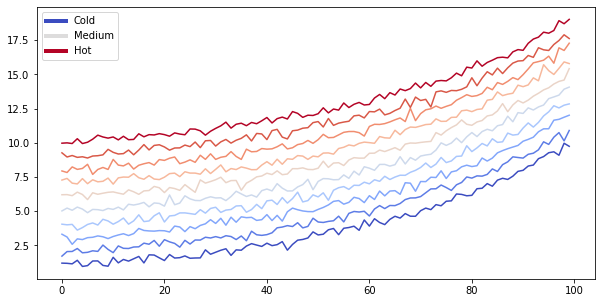

In [2]:
make_fig(figsize=(10, 5))

这可以与其他标记(如 `remove-input`)结合使用，用以**仅显示图形**。

[MyST 备忘单](myst_cheatsheet) 提供了 [可用的 `code-cell` 标签列表](myst_cheatsheet:code-cell:tags)

## 宽屏的内容

有时，您希望使用**所有**可用的水平空间。这可以让你突出特定的想法，可视化等。

### 宽屏的代码单元

你可以指定一个代码单元格的输入和/或输出应该占用所有的水平空间(包括右边的页边距)，使用以下单元格元数据标签:

```json
{
    "tags": [
        "full-width",
    ]
}
```

```{seealso}
有关如何将单元格元数据添加到笔记本的提示，请参见 [](jupyter-cell-tags)。
```

例如，让我们看一下上面设置了 `full-width` 的单元格的边距中的图。我们将告诉 Matplotlib 将其设置得更宽一些，以便我们能够利用额外的空间!

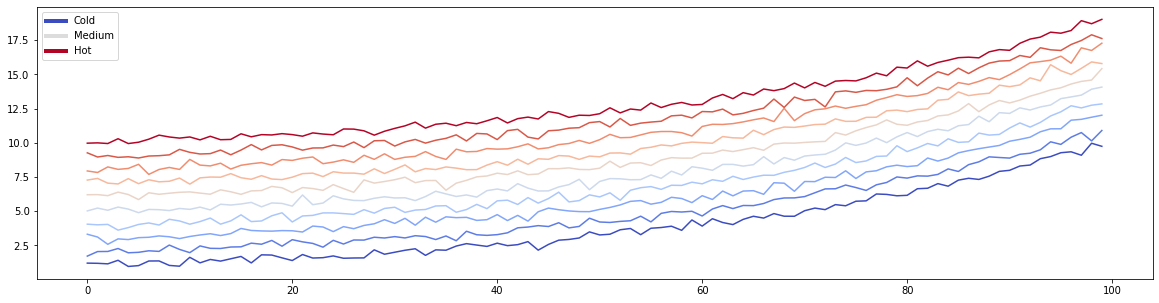

In [3]:
make_fig(figsize=(20, 5))

### 宽屏的 markdown 内容

如果您想使您的标记内容全宽，您不能这样做通过单元格标签。相反，你有以下几种选择:

1. **使用 `{div}` 指令的 `full-width` 类**。任何带有 `full-width` 的内容都会占用屏幕的全宽。例如，以下代码：

   `````
   ````{div} full-width
   ```{note}
   Here's a note that will take the full width
   ```
   ````
   `````

   结果是：

   ````{div} full-width
   ```{note}
   Here's a note that will take the full width
   ```
   ````

   有关 `<div>` 块的更多信息，请参见 `<div>` [](custom-div-blocks)。
2. **向支持类的指令添加一个 `full-width` 类**。许多指令允许你直接向它们添加 CSS 类。

   例如，上面的 `{note}` 指令允许这样做：

   ````
   ```{note}
   :class: full-width
   Here's a note that will take the full width
   ```
   ````

   结果是：

   ```{note}
   :class: full-width
   Here's a note that will take the full width
   ```

   检查该指令的文档，看看它是否支持添加你自己的类，或者使用上面描述的 `{div}` 指令。

```{admonition} **混合页边距和全宽内容**
:class: warning, full-width

在混合页边距和全宽内容时要小心。有时这些会在视觉空间中相互冲突。您应该相对较少地使用它们，以便它们能够充分地突出显示信息。
```